# p. 42-43

> Wrong definition of "Multivariate linear regression"

It seems that the definitions for “multiple / multivariable regression” and “multivariate regression” available online are highly mixed and often used interchangeably. Nevertheless, after some searching online, it seems that more respectable sources of the definitions of these terms agree on the following: 
-	**Multivariate regression**: predict multiple ($\ge 1$) dependable variables $y$ (labels);
-	**Multivariable / multiple regression**: uses multiple ($\ge 1$) input variables (independent variables / features) to predict one label $y$, e.g. $y = x1 + x2 + x3 + b$

Sources:
- "multivariate regression is a technique that estimates a single regression model with more than one outcome variable. When there is more than one predictor variable in a multivariate regression model, the model is a multivariate multiple regression." (https://stats.oarc.ucla.edu/stata/dae/multivariate-regression-analysis/)
- "Multivariable linear regression … with more variables … linear regression with two input variables and one output variable" (p . 191, “Essential Math for Data Science”, Thomas Nield (O’REILLY)) 
- "Statistically speaking, multivariate analysis refers to statistical models that have 2 or more dependent or outcome variables,1 and multivariable analysis refers to statistical models in which there are multiple independent or response variables." (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518362/)
- "Multivariate Multiple Regression is a method of modeling multiple responses, or dependent variables, with a single set of predictor variables." (https://library.virginia.edu/data/articles/getting-started-with-multivariate-multiple-regression)



# Chapter 3

## p. 56 (erroneous epoch definition)

At the bottom of the page there is a definition of an *epoch*. In the ML and SGD literature online, there is a different definition for this term:
- **1 epoch**: going through the entire dataset once. In classical SGD with replacement, we cannot use the entire dataset due to replacement, so we better use term "iteration"


## p. 66 (Loss calculation mistake)

Check on Github - mistake in calculating RMSE - used prediction for the first data point vs entire label set, rather than all predictions vs all labels.

| | |
| - | - |
| Version 'a':<br>Book version (erroneous)<br> `predictions = features[0] * _m + _b` | 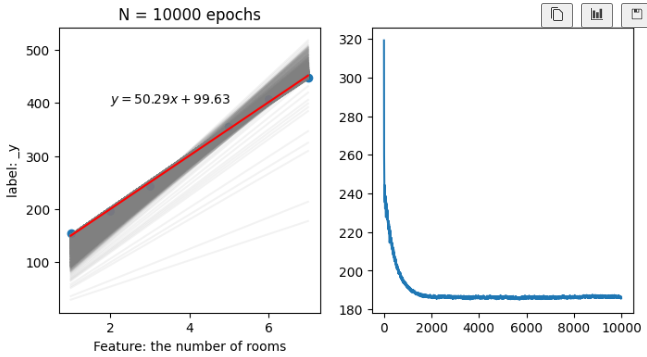 | |
| Version 'b':<br>My version (corrected)<br> `predictions = [ i*_m1 + j*_m2 + _b for i,j in features ]` | 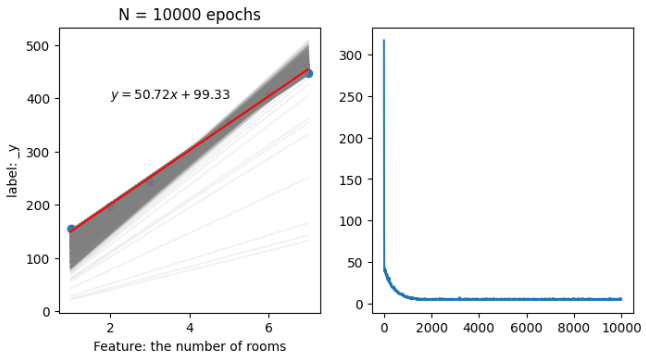 |

Code:

```py
def linear_regression(features_data, labels, learning_rate=0.01, epochs=1000):
	""" 
	learning_rate = a very small number by which changes to the model are made. 
	epochs = how many iterations of learning we need to perform. 
	"""
	# Generate random values for the slope and y-intercept
	m = random.random() 
	b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for epoch in range(epochs):
		### Here there was a mistake:
		### The book (version 'a') just used prediction for the first data point in the 'features' array,
		### therefore, rmse was calculated as rmse for each point in the labels minus the same prediction for the first data point.
		### this is incorrect, as we should compare predictions for all data points in features vs all labels
		### so version 'b' is correct
		# predictions = features_data[0] * _m + _b # Version 'a' (manning book)
		predictions = [ i*m + b for i in features_data ] # version 'b' (my version)
		# print(predictions)
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features_data)-1) 
		x = features_data[i]
		y = labels[i]
		# Apply the square trick to move the line closer to our point
		m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
		slope_intercept_list.append([m, b])
	return slope_intercept_list, errors
```


## Implementing SGD for simple linear regression (p.55)

> This example was slightly modified from the excellent book "Grokking Machine Learning" by the brilliant Luis Serrano.

Below is a book's intuition for Stochastic Gradient Descent for simple linear regression, given as "square trick" and "absolute trick". 

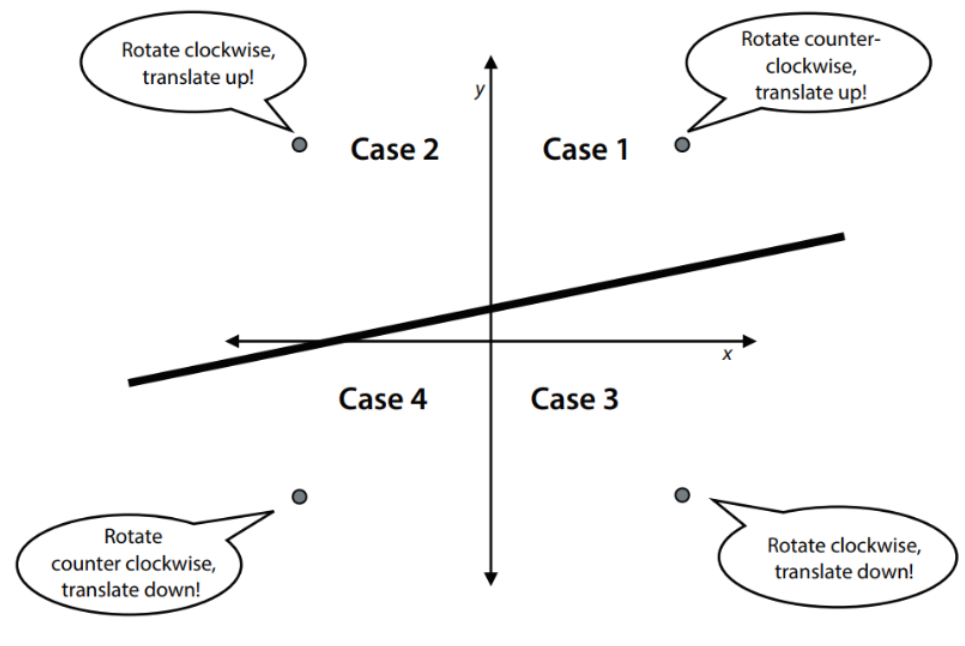

In the "square trick", we want to move the line up if the real point is above the prediction line and move it downward when the point is below the prediction line. 

- **Adjusting the y-intercept $b$**:
  - We want to add some number to the y-intercept $b$ when point is above the prediction line, and subtract if point is below; 
  - therefore, we can just add $ \eta (p-\hat{p})$ to y-intercept. 
- **Adjusting the slope $m$**:
  - We can adjust the slope by adding to slope the product of $x$ and $(y - \hat{y})$
  - A detailed explanation below:
  - We need to reduce $m$ in cases 2 and 3:
    - Case 2: $x < 0, (y - \hat{y}) > 0, x * (y - \hat{y}) < 0$
    - Case 3: $x > 0, (y - \hat{y}) < 0, x * (y - \hat{y}) < 0$
  - We need to increase $m$ in cases 1 and 4:
    - Case 1: $x > 0, (y-\hat{y}) > 0, x * (y-\hat{y}) > 0$ 
    - Case 4: $x < 0, (y-\hat{y}) < 0, x * (y-\hat{y}) > 0$

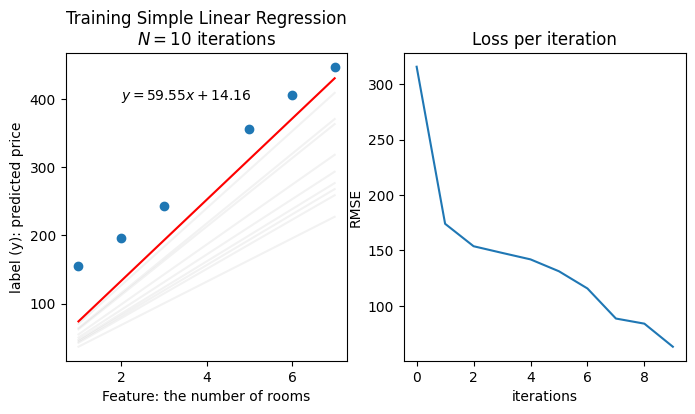

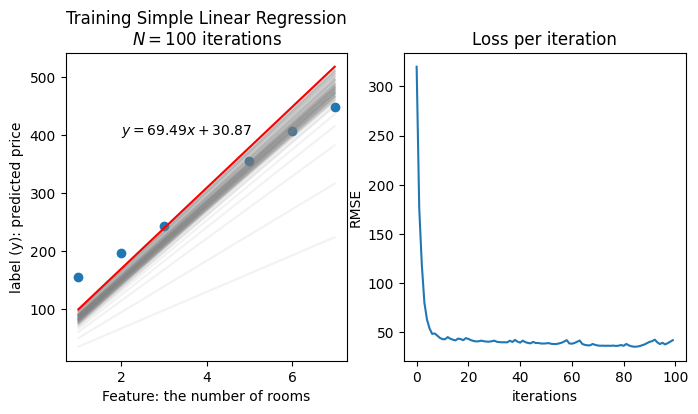

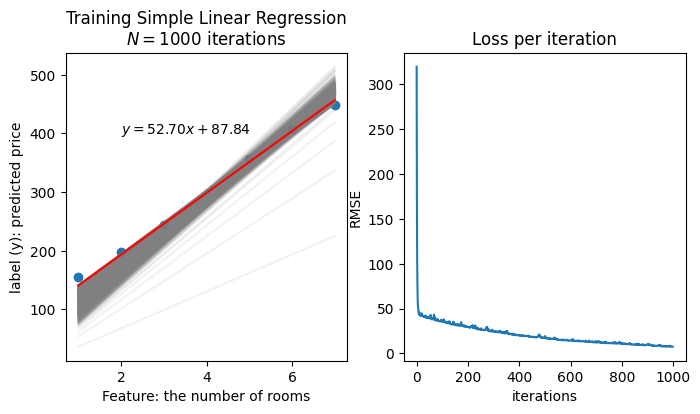

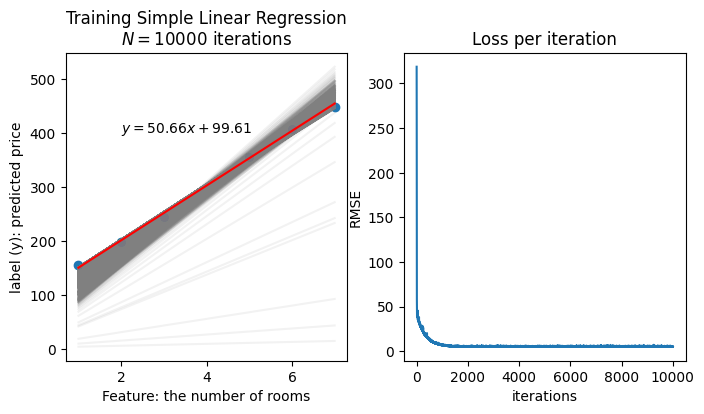

In [14]:
"""
Simple Linear Regression 
parameter training with Stochastic Gradient Descent
"""
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def rmse(labels, predictions):
	"""
	return Root Mean Square Error of predictions
    """
	### y - y_hat
	differences = np.subtract(labels, predictions)
	n = len(labels)
	### here we use np.dot dot product of differences, which is essentially the sum of squares of each difference; a sum of products of corresponding terms in two vectors
	return np.sqrt(1/n * (np.dot(differences, differences)))

def square_trick(_b, _m, _x, _y, learning_rate):
	"""
	"Grokking Machine Learning", p. 55
	This function updates parameters b and m based on one data point _x and label _y.
	It basically represents a derivative of the cost function e(x) of square difference:
	e(x) = sum( y_hat - y )^2 = sum( mx+b - y )^2
	with respect to m and b separately
	"""
	### Calculate prediction
	_y_pred = _b + _m*_x
	### Change y-intercept $b$
	_b += learning_rate * (_y - _y_pred)
	### Change slope $m$
	_m += learning_rate * _x * (_y - _y_pred)
	return _m, _b

def absolute_trick(b, m, x, y, learning_rate):
	"""
	you can also use this way of updating parameters m and b

	simpler than the square trick because it only uses _x to adjust the parameters
	
	is based on another loss metric
	"""
	y_pred = b + m*x 
	### if the point is above the line
	if y > y_pred:
		### increase slope m
		m += learning_rate * x 
		### translate the intercept up
		b += learning_rate
	else:
		m -= learning_rate * x 
		b -= learning_rate 
	return m, b 

def linear_regression(features_data, labels, learning_rate=0.01, epochs=1000):
	""" 
	algorithm for linear regression learning
	"""
	# Generate random values for the slope and y-intercept
	m = random.random() 
	b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for iteration in range(epochs):
		### Here there was a mistake in the book's code in calculating predictions for error estimation: see subsection "p. 66 (Loss calculation mistake)"
		predictions = [ i*m + b for i in features_data ]
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features_data)-1) 
		x = features_data[i]
		y = labels[i]
		# Apply the square trick to move the line closer to our point
		m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
		slope_intercept_list.append([m, b])
	return slope_intercept_list, errors

features_data = np.array([1,2,3,5,6,7])
labels = np.array([155,197,244,356,407,448])


### For different number of iterations
for i in [10, 100, 1000, 10000]: 
	fig, axes = plt.subplots(1, 2, figsize=(8,4))
	### [0] Left plot
	### plot data points
	axes[0].scatter(features_data, labels)
	axes[0].set_xlabel('Feature: the number of rooms')
	axes[0].set_ylabel('label (y): predicted price')
	axes[0].set_title(f"Training Simple Linear Regression\n$N = {i}$ iterations") 
	### Plot lines of intermediate trained linreg models
	slope_intercept_list_ready, errors = linear_regression(features_data, labels, learning_rate=0.01, epochs=i)
	for i in slope_intercept_list_ready:
		current_slope, current_intercept = i[0], i[1]
		axes[0].plot( features_data, features_data*current_slope + current_intercept, color='grey', alpha=0.1 )
	### Plot final trained linreg line (red)
	final_slope, final_intercept = slope_intercept_list_ready[-1][0], slope_intercept_list_ready[-1][1]
	axes[0].plot( features_data, features_data*final_slope + final_intercept, color='red' )
	axes[0].text(2, 400, rf'$y={final_slope:.2f}x + {final_intercept:.2f}$')
	### [1] Right plot
	axes[1].plot( range(len(errors)), errors )
	axes[1].set_xlabel('iterations')
	axes[1].set_ylabel('RMSE')
	axes[1].set_title( 'Loss per iteration')




In [ ]:
"""
multiple linear regression

equation: 
y = 5x_1 + 3x_2 + 10
"""
X = [[i,j] for i in range(1,5) for j in range(1,5)]
print(X)
Y = [5*i + 3*j + 10 for i,j in X]
Y


[[1, 1], [1, 2], [1, 3], [1, 4], [2, 1], [2, 2], [2, 3], [2, 4], [3, 1], [3, 2], [3, 3], [3, 4], [4, 1], [4, 2], [4, 3], [4, 4]]


[18, 21, 24, 27, 23, 26, 29, 32, 28, 31, 34, 37, 33, 36, 39, 42]

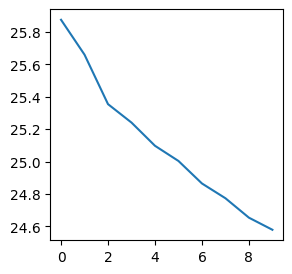

[3.995679344278738, 4.499205468885945]
2.2727028685636204


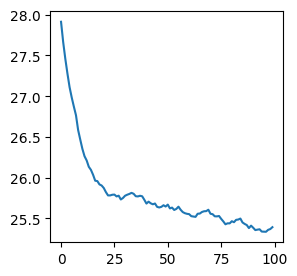

[5.769180966514337, 4.457233122467204]
3.1013079746067547


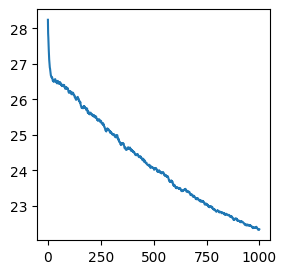

[5.51940883248782, 3.5170934416205806]
6.710748011245742


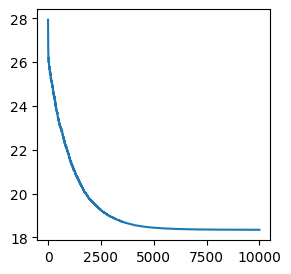

[5.000264502470023, 3.0002335356953593]
9.998569098194828


In [ ]:
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def rmse(labels, predictions):
	n = len(labels)
	### y - y_hat
	differences = np.subtract(labels, predictions)
	### here we use np.dot dot product of differenreces, which is essentially sum of squares of each difference
	return np.sqrt(1/n * (np.dot(differences, differences)))

def square_trick(_b, _m, _x, _y, learning_rate):
	"""
	"Grokking Machine Learning", p. 55
	"""
	_m1, _m2 = _m[0], _m[1]
	_x1, _x2 = _x[0], _x[1]
	### Calculate prediction
	_y_pred = _m1*_x1 + _m2*_x2 + _b
	### Change y-intercept $b$
	_b += learning_rate * (_y - _y_pred)
	### Change slope $m$
	_m1 += learning_rate * _x1 * (_y - _y_pred)
	_m2 += learning_rate * _x2 * (_y - _y_pred)
	return [_m1, _m2], _b

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
	""" 
	learning_rate = a very small number by which changes to the model are made. 
	epochs = how many iterations of learning we need to perform. 
	"""
	# Generate random values for the slope and y-intercept
	_m1, _m2 = random.random(), random.random() 
	_m = [_m1, _m2]
	_b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for epoch in range(epochs):
		### Here there was a mistake in the original code in the book: see subsection "Loss calculation mistake"
		### The book (version 'a') just used prediction for the first data point in the 'features' array,
		### therefore, rmse was calculated as rmse for each point in the labels minus the same prediction for the first data point.
		### this is incorrect, as we should compare predictions for all data points in features vs all labels
		### so version 'b' is correct
		# predictions = features[0] * _m + _b # Version 'a' (manning book)
		predictions = [ i*_m1 + j*_m2 + _b for i,j in features ] # version 'b' (my version)
		# print(predictions)
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features)-1) 
		_x = features[i]
		_y = labels[i]
		# Apply the square trick to move the line closer to our point
		_m, _b = square_trick(_b, _m, _x, _y, learning_rate=learning_rate)
		slope_intercept_list.append([_m, _b])
	return slope_intercept_list, errors

# features = np.array([1,2,3,5,6,7])
# labels = np.array([155,197,244,356,407,448])
features = [[i,j] for i in range(1,5) for j in range(1,5)]
labels = [5*i + 3*j + 10 for i,j in features]

# Plot the visualisations
figure_size, epoch_alpha = (4,4), 0.1
# for i in [10, 100, 1000]: # Different number of epochs
for i in [10, 100, 1000, 10000]:
	### Multiple plots
	plt.figure(figsize=(3,3))
	slope_intercept_list_ready, errors = linear_regression(features, labels, learning_rate=0.01, epochs=i)
	### Plot final line
    ### [1] Right plot
	plt.plot( range(len(errors)), errors )
	plt.show()
	print(slope_intercept_list_ready[-1][0])
	print(slope_intercept_list_ready[-1][1])

